Try to find shortest path from all the possible lowest points

Maybe is better to find shortest from top to bottom, in reverse walking fashion

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#file_input="input_test.txt"
file_input="input.txt"

with open(file_input,'r') as f:
    lines = f.readlines()

In [41]:
height = len(lines)
width = len(lines[0].strip())

In [42]:
import numpy as np
nodes_np = np.zeros( (height, width))

In [43]:
startloc = None
endloc = None
a0 = ord('a')
for iy , line0 in enumerate(lines):
    line1= line0.strip()
    for ix, char0 in enumerate(line1):
        value = ord(char0)-a0
        if char0=='S':
            value = 0
            startloc=(iy,ix)
        if char0=='E':
            value = ord('z')-a0
            endloc=(iy,ix)
        nodes_np[iy,ix] = value

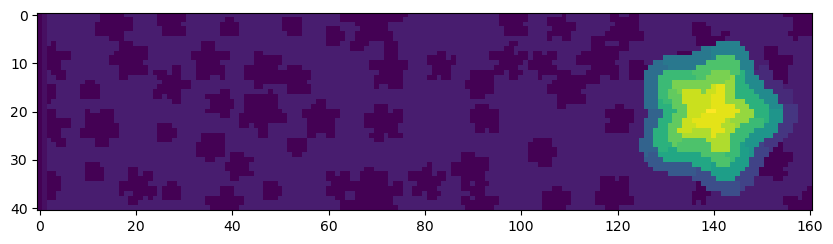

In [44]:
plt.figure(figsize = (10,10))
plt.imshow(nodes_np)

In [45]:
#nodes_np

In [46]:
import networkx as nx #graphs
MG = nx.MultiDiGraph()

In [47]:
#graph, add nodes as tuple
for iy in range(height):
    for ix in range(width):
        node = (iy,ix)
        MG.add_node(node)

Fill with valid edges

In [48]:
for iy in range(height):
    for ix in range(width):
        v0 = nodes_np[iy,ix]

        #up
        if iy>0:
            v1 = nodes_np[iy-1,ix]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy-1,ix))
        #down
        if iy<height-1:
            v1 = nodes_np[iy+1,ix]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy+1,ix))
        #Left
        if ix>0:
            v1 = nodes_np[iy,ix-1]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy,ix-1))
        
        #Right
        if ix<width-1:
            v1 = nodes_np[iy,ix+1]
            if v1-v0<=1:
                MG.add_edge((iy,ix), (iy,ix+1))

In [49]:
#MG.edges()

In [50]:
#Compute shortest path
print(startloc)
print(endloc)

(20, 0)
(20, 139)


Now get all paths to all the bottoms

In [51]:
#Get a list of all possible starting points
np.where(nodes_np == 0)

(array([ 0,  0,  0, ..., 40, 40, 40], dtype=int64),
 array([  0,  13,  14, ..., 158, 159, 160], dtype=int64))

In [52]:
test =  np.array(np.where(nodes_np == 0)).T
test

array([[  0,   0],
       [  0,  13],
       [  0,  14],
       ...,
       [ 40, 158],
       [ 40, 159],
       [ 40, 160]], dtype=int64)

In [53]:
list_starts = [ tuple(i) for i in test]

In [54]:
list_starts

[(0, 0),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),
 (0, 101),
 (0, 109),
 (0, 119),
 (0, 120),
 (0, 123),
 (0, 124),
 (0, 155),
 (0, 156),
 (0, 157),
 (0, 158),
 (0, 159),
 (0, 160),
 (1, 0),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 39),
 (1, 40),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 63),
 (1, 64),
 (1, 65),
 (1, 66),
 (1, 67),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (1, 96),
 (1, 97),
 (1, 98),
 (1, 99),
 (1, 100),
 (1, 101),
 (1, 106),
 (1, 107),
 (1, 108),
 (1, 109),
 (1, 119),
 (1, 120),
 (1, 121),
 (1, 122),
 (1, 123),
 (1, 124),
 (1, 157),
 (1, 158),
 (1, 159),
 (1, 160),
 (2, 0),
 (2,

In [56]:
shortest_path_lengths=[]
 
for startloc0 in list_starts:
    try:
        v0 = nx.shortest_path_length(MG,startloc0,endloc)
        shortest_path_lengths.append(v0)
    except:
        pass

shortest_path_lengths=np.array(shortest_path_lengths)

In [57]:
shortest_path_lengths

array([499, 498, 497, 496, 495, 494, 493, 494, 492, 492, 493, 491, 491,
       492, 493, 494, 495, 490, 490, 491, 492, 493, 494, 489, 489, 490,
       491, 488, 488, 489, 490, 487, 490, 491, 492, 486, 492, 493, 485,
       484, 484, 485, 483, 483, 484, 482, 482, 483, 481, 481, 480, 481,
       481, 482, 482, 482, 483, 483, 483, 484, 485, 486, 487, 484, 484,
       485, 486, 487, 488, 485, 485, 486, 487, 486, 486, 487, 488, 485,
       488, 489, 490, 484, 490, 491, 483, 482, 481, 482, 483, 484, 484,
       485, 485, 485, 486, 487, 486, 486, 487, 488, 487, 487, 488, 489,
       488, 488, 489, 487, 487, 488, 486, 485])

In [58]:
np.min(shortest_path_lengths)

480